# Imports

For visualization, we use `matplotlib` in this Notebook:

In [2]:
%pip install matplotlib 
# install using pip
# %conda install matplotlib # or install using conda

  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.0 MB 2.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.0 MB 2.7 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.0 MB 2.9 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.0 MB 2.9 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.0 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 3.0 MB/s eta 0:00:01
   -----------------------------

In [1]:
import torch
from torch.utils.data import Dataset
from matplotlib import pyplot as plt

# Data Handling

We will now look at a 2-class classification problem with a generated toy-dataset.\
The data will be stored inside a PyTorch `Dataset` subclass, which will provide you with some utilities like automatic shuffling and batching for the training loop, if paired with `DataLoader`.

The 2 classes are two normal distributions with different means.

In [2]:


class TwoClassDataset(Dataset):
    def __init__(self):
        # create synthetic dataset
        # 生成100个样本，每个样本有2个特征;使用均值为1，标准差为1的正态分布
        features_a = torch.normal(mean=1., std=1.0, size=(100,2))
        # 100个样本，标签全为0
        labels_a = torch.zeros(100, dtype=torch.long) #torch.long=torch.int64
        # 生成100个样本，每个样本有2个特征;使用均值为1，标准差为1的正态分布
        features_b = torch.normal(mean=-1.0, std=1.0, size=(100,2))
        # 100个样本，标签全为1
        labels_b = torch.ones(100, dtype=torch.long)
        # 将类A和类B的特征沿第0维拼接，得到200x2的矩阵
        self.data = torch.cat((features_a, features_b), dim=0) # X: 200 x 2 matrix : [x1,x2]
        # 将类A和类B的标签拼接，得到长度为200的二进制向量
        self.labels = torch.cat((labels_a, labels_b), dim=0) # Y: binary vector of length 200: 0: class A, 1: class B
    
    def __len__(self):
        return self.data.size(dim=0)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
dataset = TwoClassDataset()

We can plot the 2D dataset to get an idea:

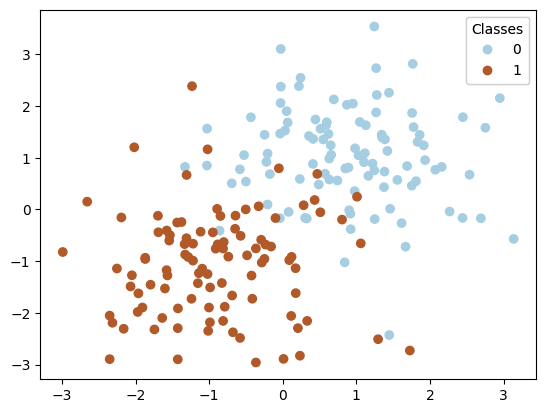

In [3]:
# plot both classes
fig, ax = plt.subplots()
# 分别表示数据集的第一列和第二列，作为x和y坐标;c=dataset.labels 根据标签给每个点着色;cmap='Paired' 使用'Paired'颜色映射，为不同类别选择对比色。
scatter = ax.scatter(dataset.data[:,0], dataset.data[:,1], c=dataset.labels, cmap='Paired')
# 创建图例，显示不同类别的颜色说明。
legend = ax.legend(*scatter.legend_elements(), title="Classes")
# ax.add_artist(legend) 将图例添加到图表中
ax.add_artist(legend)
# plt.show() 显示绘制的图形
plt.show()

In [ ]:
print("first sample (input, label):", dataset[0])

first sample (input, label): (tensor([0.4099, 0.8810]), tensor(0))
